<b>1.</b> Using the lower cut-off $p_0 =0.01$ and upper cut-off $0.2$ with correct aspect ratio $N/M = 2.5$, and empirical $\hat{p}$

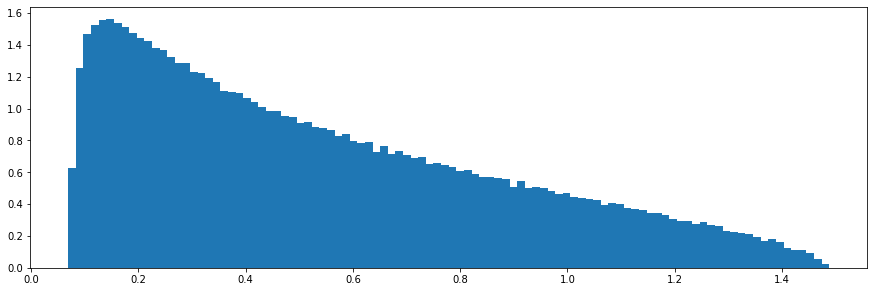

[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import imp
import main
imp.reload(main)

N=2500
M = 1000
p0 = 0.01
p1 = 0.2
S, ms = main.power(N, M, p0, p1=p1, emp=True)
S = S[1:len(S)]
for i in range(50):
    Snew, msnew = main.power(N, M, p0, emp=True)
    Snew = Snew[1:len(Snew)]
    S = np.append(S, Snew)
    ms = np.append(ms, msnew)
fig, ax = plt.subplots(figsize=(15,4.8))
ax.hist(S, bins=100, density=True)
plt.show()
print(ms)

<b>2.)</b> Much sparser matrix with correct aspect ratio.

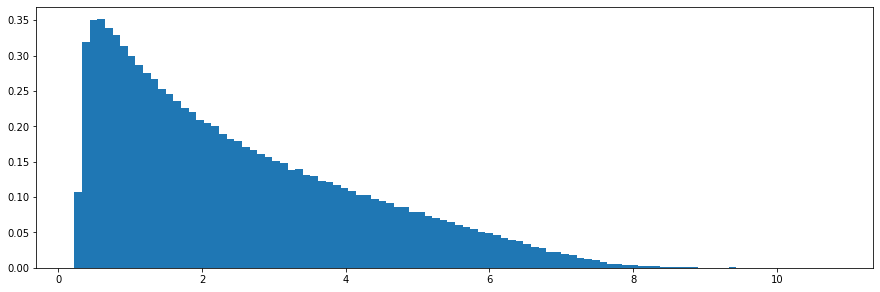

In [28]:
N=500
M = 1250
p0 = 0.8/N
p1 = 0.01
S= main.power(N, M, p0, emp=False, k=2)
#S=S[1:len(S)]
for i in range(250):
    Snew = main.power(N, M, p0, emp=False)
    #Snew = Snew[1:len(Snew)]
    S = np.append(S, Snew)
fig, ax = plt.subplots(figsize=(15,4.8))
ax.hist(S, bins=100, density=True)
plt.show()

<b>3.)</b> Gaussian matrix, with limiting covariance matrix having a tail like (a rescaling of) $(t-1)^{-0.8} \mathbb{1}_{1<t<2}$

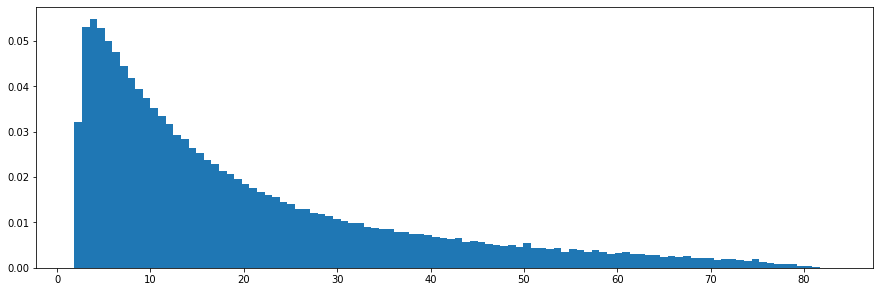

In [84]:
imp.reload(main)
N = 500
M = 1250
m = 1200
var = np.random.uniform(size=m)
var = np.abs(var)
var = var*var*var*var*var
var = var / np.max(var)
var = var*4.0
var = np.append(np.ones(M-m), var+1.0)
#var = np.abs(var)
var = var + 1.0
S = main.generalWishart(N, M, var)
for i in range(100):
    S = np.append(S, main.generalWishart(N, M, var))
fig, ax = plt.subplots(figsize=(15,4.8))
ax.hist(S, bins=100, density=True)
plt.show()


<b>4.)</b> Gaussian matrix with limiting covariance matrix eigenvalues having a density vanishing like a power law $x^n$ for $n=9$.

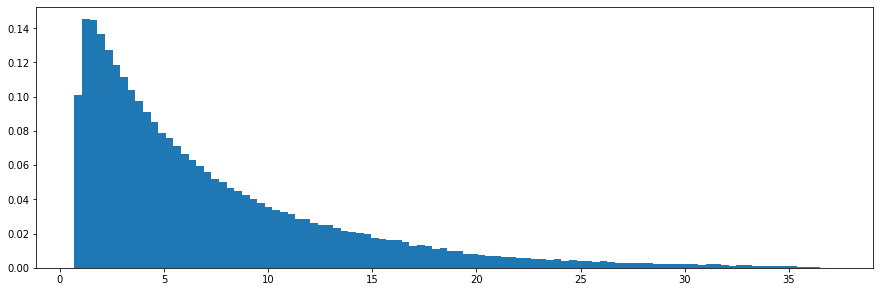

In [6]:
import numpy as np
import imp
import main
import matplotlib.pyplot as plt

imp.reload(main)
N = 1250
M = 500
m = 400
n=10.0
var = np.random.uniform(size=m)
var = np.abs(var)
var = np.power(var, 1.0/n)
var = 1-var
var = var*8.0
var = np.append(np.ones(M-m), var+1.0)
#var = np.abs(var)
var = var + 1.0
S = main.generalWishart(N, M, var)
for i in range(100):
    S = np.append(S, main.generalWishart(N, M, var))
fig, ax = plt.subplots(figsize=(15,4.8))
ax.hist(S, bins=100, density=True)
plt.show()

<b> 5.)</b> Try to find a limiting covariance such that the square root behavior appears and disappers when changing aspect ratio

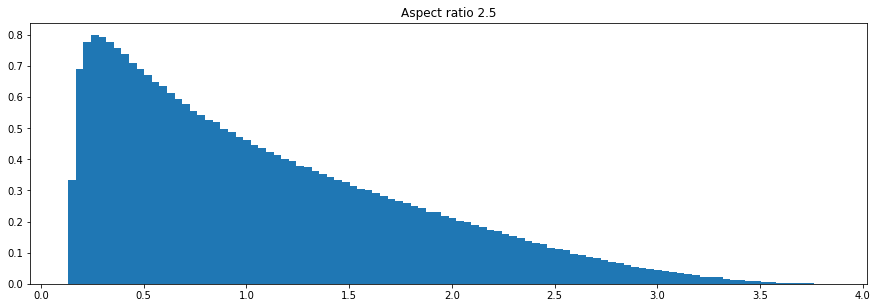

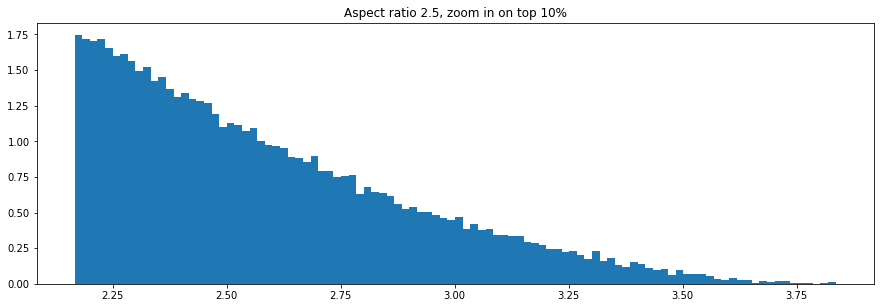

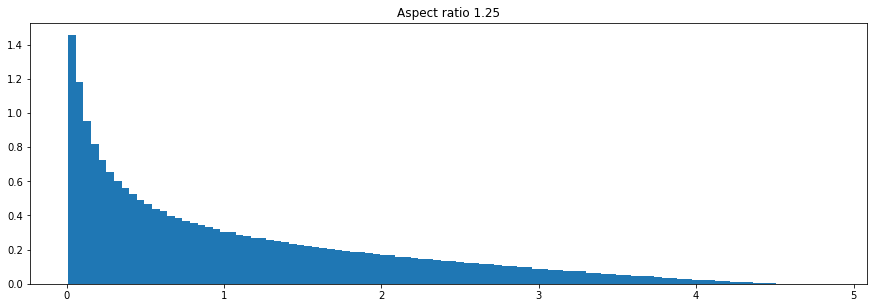

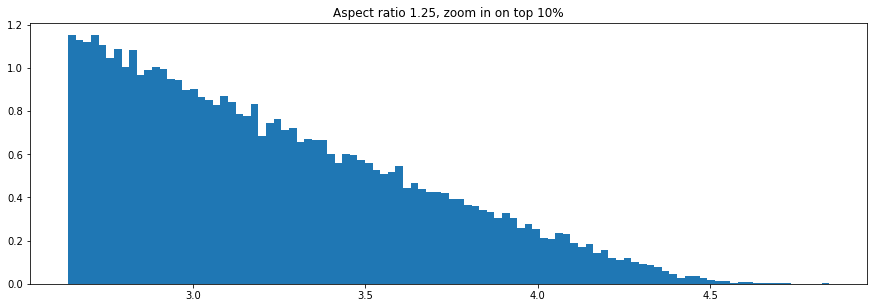

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import imp
import main

N=1250
M= 500
m = 100
n=3.0
var = np.random.uniform(size=m)
var = np.abs(var)
var = np.power(var, 1.0/n)
var = 1-var
var = var*0.7
var = np.append(np.ones(M-m), var+1.0)

S = main.generalWishart(N, M, var)
for i in range(500):
    var = np.random.uniform(size=m)
    var = np.abs(var)
    var = np.power(var, 1.0/n)
    var = 1-var
    var = var*0.75
    var = np.append(np.ones(M-m), var+1.0)
    Snew = main.generalWishart(N, M, var)
    S = np.append(S, Snew)
B = np.sort(S)[int(len(S)*0.9):len(S)]
fig, ax = plt.subplots(figsize=(15,4.8))
ax.hist(S, bins=100, density=True)
ax.set_title('Aspect ratio 2.5')
plt.show()
fig, ax = plt.subplots(figsize=(15,4.8))
ax.hist(B, bins=100, density=True)
ax.set_title('Aspect ratio 2.5, zoom in on top 10%')
plt.show()

N=625
S = main.generalWishart(N, M, var)
for i in range(500):
    var = np.random.uniform(size=m)
    var = np.abs(var)
    var = np.power(var, 1.0/n)
    var = 1-var
    var = var*0.75
    var = np.append(np.ones(M-m), var+1.0)
    Snew = main.generalWishart(N, M, var)
    S = np.append(S, Snew)
B = np.sort(S)[int(len(S)*0.9):len(S)]
fig, ax = plt.subplots(figsize=(15,4.8))
ax.hist(S, bins=100, density=True)
ax.set_title('Aspect ratio 1.25')
plt.show()

fig, ax = plt.subplots(figsize=(15,4.8))
ax.hist(B, bins=100, density=True)
ax.set_title('Aspect ratio 1.25, zoom in on top 10%')
plt.show()


What the usual MP distribution at aspect ratio $\phi = M/N = (2.5)^{-1}$ looks like

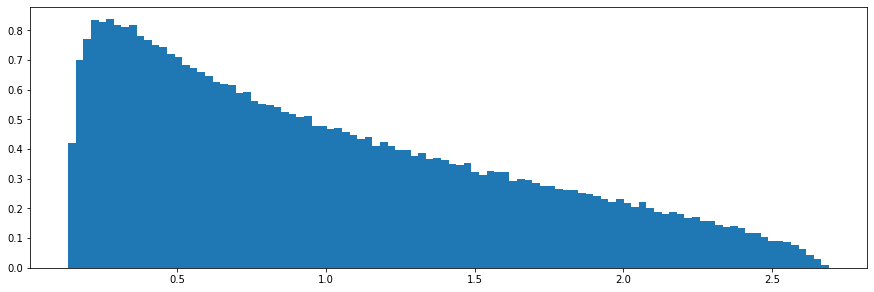

In [12]:
N = 1250
M = 500
var = np.random.normal(size=M)
var = var / (np.max(var) - np.min(var))*0.0001
var = var + 1.0
S = main.generalWishart(N, M, var)
for i in range(90):
    S = np.append(S, main.generalWishart(N, M, var))
fig, ax = plt.subplots(figsize=(15,4.8))
ax.hist(S, bins=100, density=True)
plt.show()
